# Paris: spatial join of districts and bike stations
use the spatial join operation to identify the district in which each station is located.


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
dist=gpd.read_file("paris\paris_districts_utm.geojson")
bike=gpd.read_file("paris\paris_sharing_bike_stations_utm.geojson")

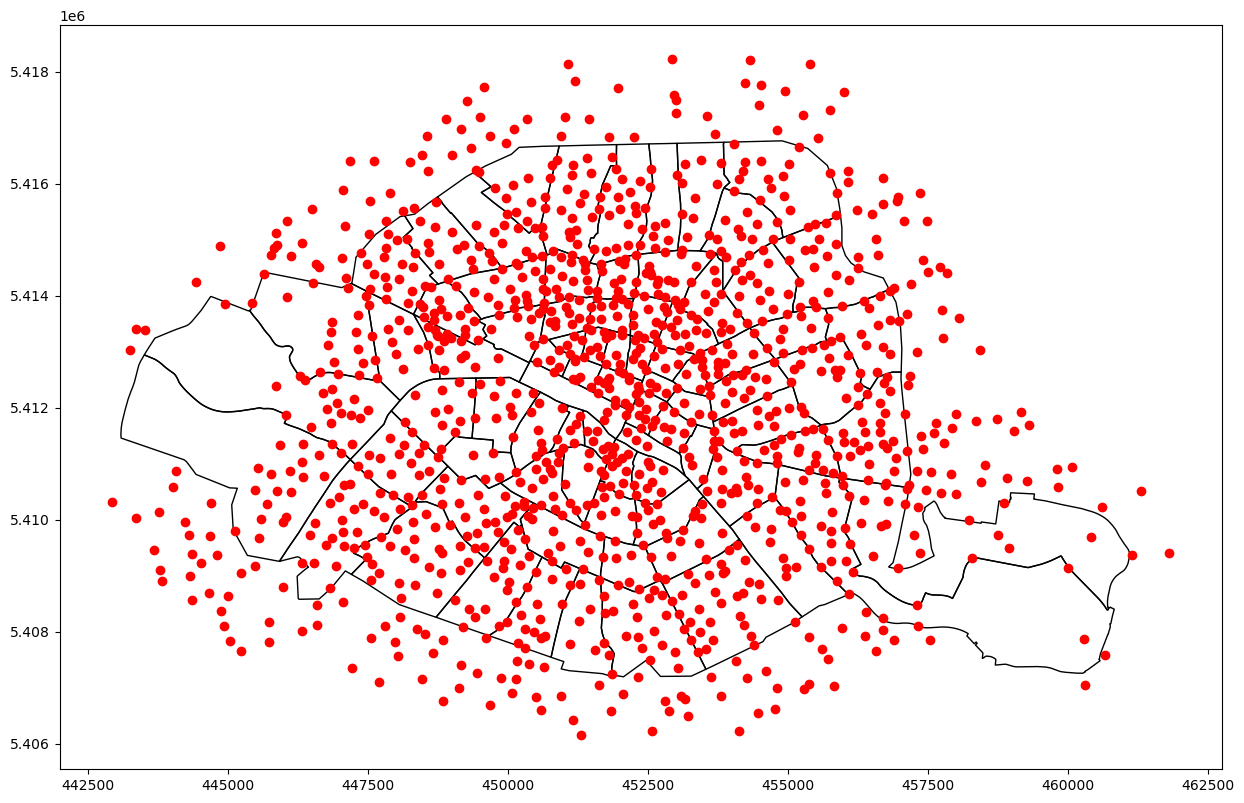

In [19]:
fig, ax=plt.subplots(figsize=(15,15))
dist.plot(ax=ax, color='none')
bike.plot(ax=ax, color='red')
plt.show()

# use the spatial join operation to identify the district in which each station is located.

In [20]:
dist.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [21]:
bike.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (450804.449 5409797.268)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (456414.352 5410698.461)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (456366.909 5411563.320)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (458730.707 5411789.995)
4,43006 - MINIMES (VINCENNES),28,27,POINT (458234.930 5409991.067)


In [9]:
joined=gpd.sjoin(bike, 
                 dist[['district_name', 'geometry']], op="within")

C:\Users\kedir\anaconda3\envs\geo_ds\Lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [26]:
joined.head()

,name,bike_stands,available_bikes,geometry,index_right,district_name
0,14002 - RASPAIL QUINET,44,4,POINT (450804.449 5409797.268),52,Montparnasse
143,14112 - FAUBOURG SAINT JACQUES CASSINI,16,0,POINT (451419.447 5409421.529),52,Montparnasse
293,14033 - DAGUERRE GASSENDI,38,1,POINT (450708.228 5409406.941),52,Montparnasse
346,14006 - SAINT JACQUES TOMBE ISSOIRE,22,0,POINT (451340.026 5409124.575),52,Montparnasse
429,14111 - DENFERT-ROCHEREAU CASSINI,24,8,POINT (451274.511 5409609.731),52,Montparnasse


# Exercise 2:Map of tree density by district (1)
Using a dataset of all trees in public spaces in Paris, the goal is to make a map of the tree density by district.
For this, we first need to find out how many trees each district contains, which we will do in this exercise.
In the following exercise, we will then use this result to calculate the density and create a map.

To obtain the tree count by district, we first need to know in which district each tree is located, which we can do with a spatial join.
Then, using the result of the spatial join, we will calculate the number of trees located in each district using the pandas 'group-by' functionality.

In [10]:
# Import the trees dataset "paris_trees.gpkg" and call the result trees
trees=gpd.read_file('paris\paris_trees_small.gpkg')

In [29]:
trees.head()

,species,location_type,geometry
0,Marronnier,Alignement,POINT (455834.122 5410780.606)
1,Marronnier,Alignement,POINT (446546.284 5412574.697)
2,Marronnier,Alignement,POINT (449768.283 5409876.557)
3,Marronnier,Alignement,POINT (451779.708 5409292.071)
4,Sophora,Alignement,POINT (447041.361 5409756.712)


In [11]:
#Add a column with the 'district_name' to the trees dataset using a spatial join. Call the result joined.
# Spatial join of the trees and districts datasets
joined =joined =joined=gpd.sjoin(trees,dist)

In [36]:
joined.head()

,species,location_type,geometry,index_right,id,district_name,population
0,Marronnier,Alignement,POINT (455834.122 5410780.606),43,44,Sainte-Marguerite,36476
130,Micocoulier,Alignement,POINT (455458.848 5411310.443),43,44,Sainte-Marguerite,36476
142,Platane,Alignement,POINT (455704.681 5410991.067),43,44,Sainte-Marguerite,36476
402,Cedrele,Alignement,POINT (455538.223 5411112.314),43,44,Sainte-Marguerite,36476
428,Micocoulier,Alignement,POINT (455487.563 5411285.863),43,44,Sainte-Marguerite,36476


Calculate the number of trees located in each district: 
group the joined DataFrame by the 'district_name' column, and calculate the size of each group. 
We convert the resulting Series trees_by_district to a DataFrame for the next exercise.

In [17]:
# Calculate the number of trees in each district
trees_by_district = joined.groupby('district_name').size()

In [18]:
# Convert the series to a DataFrame and specify column name
trees_by_district = trees_by_district.to_frame(name='n_trees')


In [19]:
# Inspect the result
print(trees_by_district.head())

                 n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392


# Execise 3:Map of tree density by district (2)
Now we have obtained the number of trees by district, we can make the map of the districts colored by the tree density.

For this, we first need to merge the number of trees in each district we calculated in the previous step (trees_by_district) back to the districts dataset.
We will use the pd.merge() function to join two dataframes based on a common column.

Since not all districts have the same size, it is a fairer comparison to visualize the tree density: the number of trees relative to the area.

In [20]:
import pandas as pd

In [21]:
#Use the pd.merge() function to merge districts and trees_by_district dataframes on the 'district_name' column.
#Call the result districts_trees.
# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(dist, trees_by_district, on='district_name' )

# Inspect the result
print(districts_trees.head())

   id           district_name  population   
0   1  St-Germain-l'Auxerrois        1672  \
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...       40  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...       40  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        4  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...        7  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...        7  


In [29]:
#Add a column 'n_trees_per_area' to the districts_trees dataframe, based on the 'n_trees' column divided by the area.

# Add a column with the tree density
districts_trees['n_trees_per_area'] = districts_trees['n_trees']/districts_trees.geometry.area

In [30]:
# n_trees_per_area column is added
districts_trees.head()

,id,district_name,population,geometry,n_trees,n_trees_per_area
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",40,0.000046
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",40,0.000097
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",4,0.000015
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",7,0.000026
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7,0.000037


<Axes: >

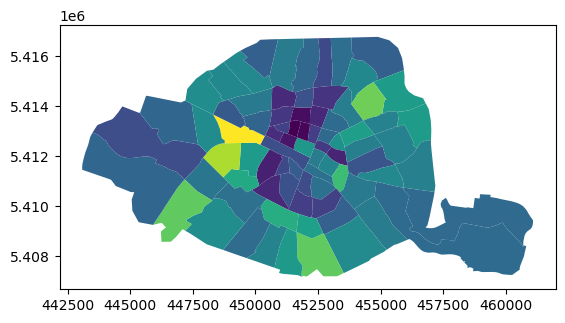

In [31]:
#Make a plot of the districts_trees dataframe, using the 'n_trees_per_area' column to determine the color of the polygons.
districts_trees.plot(column='n_trees_per_area')

# Choropleths

1. visualize the effect of just using the number of trees versus the number of trees normalized by the area of the district (the tree density). 

2 create an equal interval version of this map instead of using a continuous color scale. This classification algorithm will split the value space in equal bins and assign a color to each.

Make a plot using the 'n_trees' variable to color the polygons. Make sure to also display a legend using the legend keyword.

Repeat the same using the 'n_trees_per_area' variable. Do you see the difference?

Generate a choropleth with the 'n_trees_per_area' variable using an equal interval classification scheme. Again, make sure to add a legend.

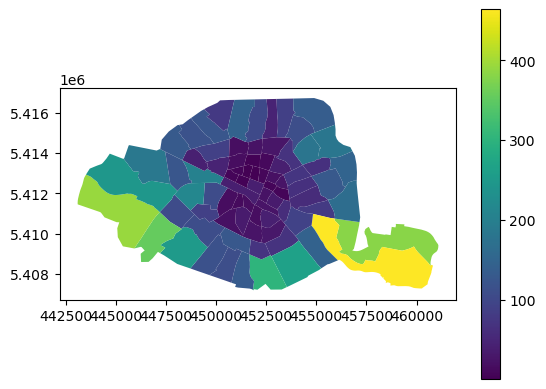

In [22]:
# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees', legend=True)
plt.show()

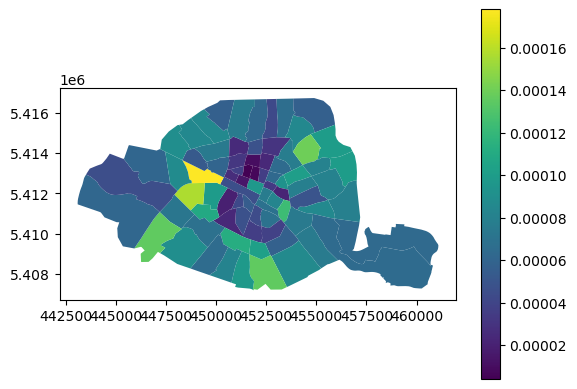

In [32]:
# Make a choropleth of the number of trees per area
districts_trees.plot(column='n_trees_per_area', legend=True)
plt.show()

# Equal_Interval Chropleths

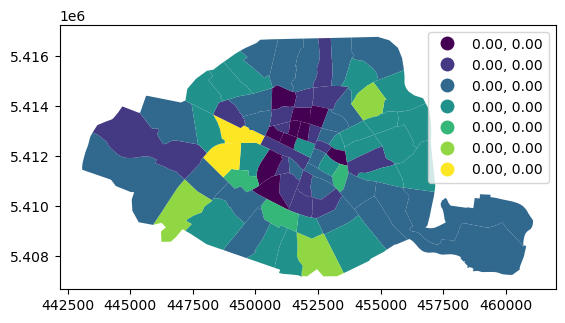

In [36]:
# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees_per_area',scheme='equal_interval',k=7,legend= True)
plt.show()

# Quantiles Chropleths

create a quantile version of the tree density map.

Remember that the quantile algorithm will rank and split the values into groups with the same number of elements to assign a color to each.

This time, we will create seven groups that allocate the colors of the YlGn colormap across the entire set of values.

Generate a choropleth using the 'n_trees_per_area' variable, a quantile classification scheme with 7 classes and the YlGn color map.

Assign the result to a variable named ax.

Remove the frames, ticks and tick labels from the plot for a cleaner map using the set_axis_off() method.


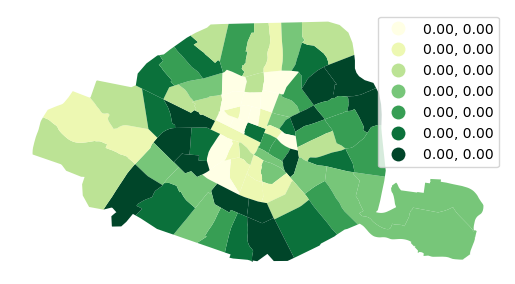

In [37]:
# Generate the choropleth and store the axis
ax = districts_trees.plot(column='n_trees_per_area', scheme='Quantiles',k=7, cmap='YlGn', legend=True)

# Remove frames, ticks and tick labels from the axis
ax.set_axis_off()
plt.show()

# Compare classification algorithms

build a multi map figure that will allow you to compare the two approaches to map variables we have seen.

You will rely on standard matplotlib patterns to build a figure with two subplots (Axes axes[0] and axes[1]) and display in each of them, respectively, an equal interval and quantile based choropleth.

Once created, compare them visually to explore the differences that the classification algorithm can have on the final result.

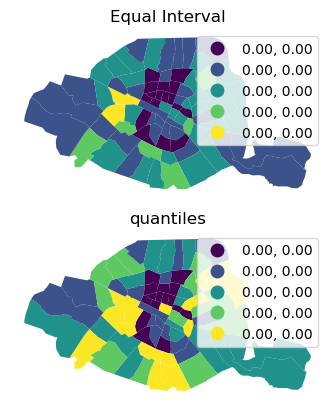

In [39]:
# Set up figure and subplots
fig, axes = plt.subplots(nrows=2)

# Plot equal interval map
districts_trees.plot(column='n_trees_per_area',scheme='equal_interval', k=5, legend=True, ax=axes[0])
axes[0].set_title('Equal Interval')
axes[0].set_axis_off()

# Plot quantiles map
districts_trees.plot(column='n_trees_per_area', scheme='Quantiles', k=5, legend=True, ax=axes[1])
axes[1].set_title('Quantiles')
axes[1].set_axis_off()

# Display maps
plt.show()